# Programming Basics

### A introductory session for programming based data analysis 

##### This session is designed for supporting the technical components of the course ***Planning Sustainable Cities (2020-1B)***, Department of Urban and Regional Planning and Geo-Information Management, Faculty Geo-Information Science and Earth Observation, University of Twente, Netherlands. Should you find the details of the course at https://canvas.utwente.nl/courses/6184.

##### Dr. Jiong (Jon) Wang,  j.wang-4@utwente.nl


## Foreword
-------------------
One of the most important skills in urban planning and management is **problem solving**. **Problem solving** is the ability to formulate problems and find solutions. For example, to analyze sustainable urban development, you may want to formulate one of the problems as *“How to quantify urban sustainability?”*, and your solutions include *find relevant indicators and combine them reasonably*. It turns out that learning to program is the best way to practice your problem-solving skills. Although there are many tools and software products can support processing indicators and multi-criteria analysis, programming allows you to handle your data and methodology with the greatest flexibility, where you benefit from your creativity. **If you did NOT but would like to know how to start programming, then this page for you.**

Obviously, it is impossible to cover every aspect of programming within a session designed for only one day. But it *is possible* to introduce you some of the basic elements that computer scientists are working with every day. Hence, you will be able to think like a computer scientist, and build sophisticated programs based upon your knowledge about these basic elements. The good news is that, you will get yourself familiar with different data types and see how programs can handle the data flexibly, you will even be able to define simple functions to automatically complete tasks for you, and apply your own functions to real spatial datasets!

To ensure that you can immediately benefit from those largest programming communities, we will start to learn programming by using *Python*, one of the most popular high level programming language today. While using *python*, you need to keep in mind that your purpose is to capture the feeling about programming, instead of just learning *Python*. In the following content, we will walk through some of the basic elements and features that lead you to define your own functions. You will apply the learnt skills to accomplish two challenges. Specifically, you will see:

- 0. Values, variables and naming conventions
- 1. Expressions
- 2. Functions
- 3. Conditionals
- 4. Iteration
- 5. Extended data types
- 6. Reading and writing files
- 7. Visualization
- 8. Challenge 1: working with point datasets
- 9. Challenge 2: working with raster datasets

There can be quite a steep learning curve while you walk through the content, so please alway keep in mind that it is very impornt and efficient to get hands on experience while learning programming. DO NOT just sit back and read the codes, DO modify and rewrite, and check the difference.

##### Credit
-------------------
You're very welcome to use the content of this page for teaching and learning. Credit to this work can be given as:
~~~
J. Wang, Programming Basics: A introductory session for programming based data analysis (2020), GitHub repository,
https://github.com/wonjohn/Bayes_for_Regression
~~~

Apart from the two **Challenges**, the contents on this page is largely based upon Allen Downey's book:
~~~
Downey, A.B., Brooks Jr, F.P., Peek, J., Todino, G., Strang, J., Robbins, A., Lamb, L., Hannah, E., Joy, W., Horton, M. and Cameron, D., 2012. Think Python 2e. Green Tea Press.
~~~
which is publicly accessible as an open material at: http://greenteapress.com/thinkpython2/thinkpython2.pdf.

The data used in the **Challenges** is from research projects funded by:
~~~
The Global Geo Health Data Centre (Utrecht University) and the Startimpulsprogramma Meten en Detecteren van Gezond Gedrag (Dutch Science Foundation).
~~~

## 0. First program
##### This is a first program of few lines of codes, what do you see? Could please try to run each lines, and try to interpret what is going on?

In [1]:
print('Greetings, there are some sample codes for UPM-1 programming course')

Greetings, there are some sample codes for UPM-1 programming course


In [2]:
data = [0.1, -0.6, 0.02, 0.7, -0.3, 0.5, -0.1, -0.9, 0.4]  # Dataset with a list of NDVI values

m = min(data)
l = len(data)

In [3]:
print(m)
print(type(m))
print(l)
print(type(l))

-0.9
<class 'float'>
9
<class 'int'>


In [4]:
data[10]

IndexError: list index out of range

## 1. Values, variables and naming conventions
##### Variables are used to store values. And values are of different data types. It is your decision to choose the names for variables. But choosing name is not entirely arbitrary. There are many keywords that Python used to refer to important parameters, functions, and actions.

In [73]:
s = 'Greetings'
m = -0.9
l = 9

print(type(s))
print(type(d))
print(type(m))

<class 'str'>
<class 'float'>
<class 'float'>


In [5]:
# You can NOT use keywords as a name of your variable.

lambda = 10.5

SyntaxError: invalid syntax (<ipython-input-5-6a7081de491c>, line 3)

In [6]:
# These variable names are OK and meaningful.

ndvi1 = 0.2
ndvi2 = 0.7

## Expressions
##### An expression can be a value, variable or combination of both by some operators.

In [7]:
(ndvi1 + ndvi2)/2  # An expression that makes computation.

0.44999999999999996

In [8]:
average = (ndvi1 + ndvi2)/2  # An expression that assigns some computed value to a variable
print(average)

0.44999999999999996


## Functions
##### A function is a named sequence of actions, such as computations. When you define a function, you specify the name and the sequence of actions. Later, you can “call” the function by name.

In [9]:
min(data) # Built-in functions for math operations

-0.9

In [10]:
type(m)  # Built-in functions for querying data type

float

In [11]:
int(m)  # Built-in functions for converting data type

0

In [15]:
# It is almost impossible to accomplish your work by only using built functions.
# You will also depend on other powerful functions that you have to import before using them.
# Usually, you import modules containing many functions and possibly also useful variables/parameters.

import math # Module containing several functions and variables

print(math)

<module 'math' (built-in)>


In [12]:
import numpy as np # A popular module for working with multi-dimensional arrays

type(np)

module

In [52]:
# To call the functions or variables contained in a module, you need a 'period' notation, which looks like a dot/point.

degrees = 45
radians = degrees/360.0 * 2 * math.pi  # Convert degrees to radians
math.sin(radians)

0.7071067811865476

In [54]:
# How about to define your own functions?
# Start with the keyword 'def'.
# Pay attention to the indention!!

def printSin(rad):
    deg = rad/(2 * math.pi) * 360.0
    print(deg)

179.90874767107852


In [55]:
type(printSin)

function

In [96]:
printSin(3.0)

171.88733853924697


In [16]:
# A function with a returned value

def printSin(rad):
    deg = rad/(2 * math.pi) * 360.0
    print(deg)
    
    return deg

In [17]:
degrees = printSin(3.0)

171.88733853924697


In [18]:
# Parameters within your functions are local.

print(deg)

NameError: name 'deg' is not defined

##### Exercise

In [99]:
# Define a simple function that compute the average of two values, and call the function.

def avg(value1, value2):
    # Your code here...
    print(average)
    
    return

## Conditionals
##### Executes your code depending on the state of the program.

In [19]:
# The most common conditional statement starts with 'if'.
# Conditional statements come along with boolean and logical operations.

ndvi1 = 0.2

if ndvi1 < -1.0 or ndvi1 > 1.0:  # Logical and Boolean operations
    print('NDVI value should be at interval of [-1, 1]')  # Pay attention to the indention

In [109]:
# A sample function defined for computing average NDVI after checking the validity of the inputs.

def avg(value1, value2):
    if value1 < -1.0 or value1 > 1.0 or value2 < -1.0 or value2 > 1.0:  # Logical and Boolean operations
        print('NDVI value should be at interval of [-1, 1]')
    else:
        average = (value1 + value2)/2
        print(average)

In [110]:
print(avg)

<function avg at 0x000001EB90004268>


In [113]:
avg(0.5,0.8)

NDVI value should be at interval of [-1, 1]


## Iteration
##### You may need to do the same operation repeatedly, there are several ways to help you to run actions and functions recursively in your program. We are introducing one of the most frequently adopted 'for' loop in this section.

In [117]:
data = [0.1, -0.6, 1.02, 0.7, -1.3, 0.5, -0.1, -0.9, 0.4]  # Another data list of NDVI values

In [118]:
# Check a series of NDVI values and print the invalid entries.

for value in data:
    if value < -1.0 or value > 1.0 or value < -1.0 or value > 1.0:  # If speed == 0
        print(value)
        print('NDVI value should be at interval of [-1, 1]')

1.02
NDVI value should be at interval of [-1, 1]
-1.3
NDVI value should be at interval of [-1, 1]


##### Exercise

In [ ]:
# Try to loop over the values in the data and print the positive NDVI values

for value in data:
    # Your code here:
        # print()

## Extended data types
##### Different data types handle numbers and values in different ways. Some data types can be more efficient for data operation and analysis.

In [28]:
# So far, we have already see some data types.

m = -0.9
l = 9
s = 'Greetings'
data = [0.1, -0.6, 1.02, 0.7, -1.3, 0.5, -0.1, -0.9, 0.4]

print(type(m))
print(type(l))
print(type(s))
print(type(data))

<class 'float'>
<class 'int'>
<class 'str'>
<class 'list'>


In [29]:
# For strings, you can query and slice the data.

s[0]
#s[0:3]
#len(s)
#s.find('t')

'G'

In [30]:
# For lists, you can also query and slice.

data[3]

0.7

In [31]:
# You also have method for list operation.
data.sort()
print(data)

[-1.3, -0.9, -0.6, -0.1, 0.1, 0.4, 0.5, 0.7, 1.02]


In [5]:
# Lists are not only for numerical numbers.

names = ['file0', 'file1', 'file2', 'file3', 'file4']

In [133]:
names[2]  # And you can again query.

'file2'

In [32]:
# One of the most powerful way to store values and information is to use the data type called arrays.
# In Python community, there is a Numpy module providing several ways to store and operate with arrays.

# First you have to import.
import numpy as np

data_array = np.array(data)  # You can use Numpy functions to convert the list of your value into Numpy array.

print(data_array)
#type(data_array)

[-1.3  -0.9  -0.6  -0.1   0.1   0.4   0.5   0.7   1.02]


In [94]:
# You can do many things to your Numpy array. For instance, check the shape.

data_array.shape

(9,)

In [95]:
# Even simple statistics.

np.mean(data_array)
#np.min(data_array)
#np.max(data_array)
#np.median(data_array)
#np.std(data_array)
#np.sum(data_array)

-0.020000000000000042

In [98]:
####################################################

# Query and operation

# index

# extract

# replace

ind = np.where(data_array > 0)
print(ind)

#data_array[ind]

(array([4, 5, 6, 7, 8], dtype=int64),)


array([0.1 , 0.4 , 0.5 , 0.7 , 1.02])

In [33]:
# Convert into interval [0, 1] ?

# Try to figure out why the following computation can achieve the purpose...
(data_array-np.min(data_array))/(np.max(data_array)-np.min(data_array))

array([0.        , 0.17241379, 0.30172414, 0.51724138, 0.60344828,
       0.73275862, 0.77586207, 0.86206897, 1.        ])

In [34]:
data_array[1:4]

array([-0.9, -0.6, -0.1])

In [11]:
# Multidimensional array

some_matrix = np.random.rand(5,4)

print(some_matrix)

[[0.45870449 0.18902579 0.83411095 0.41729329]
 [0.16235379 0.66775969 0.46371073 0.52678648]
 [0.50949089 0.41828965 0.76000967 0.37649312]
 [0.02495642 0.38995147 0.44487243 0.63657834]
 [0.97967318 0.57526278 0.87093532 0.25503996]]


##### Exercise

In [12]:
# Make query for specific row and column

# Extract specific row or column

# Operations over a row or column
#np.max(some_matrix[:,0])

## Reading and writing files
##### You won't see the power of programming until working with real datasets. In Python, you have many functions to load source data in different formats, after which you can start to process and analyze your data. Although it is impossible to cover all the situations, you can still have a feeling of how does it look like working with external datasets.

In [21]:
# Many times, we will encounter and work with matrices. Especially 2-dimensional matrix.
# For instance, we can have several rows of data samples, with different columns of indicators.
# Or, in GIS, any data is represented as tables...These are all 2-dimensional matrix.
# Luckily, Numpy provides us the greatest flexibility to handle matrices in the form of arrays.

import numpy as np  # Import module

my_data = np.genfromtxt('veg_t.csv', delimiter=',')  # Read data of temperature and vegetation
print(my_data)  # Print data

[[       nan        nan]
 [ 0.506782  18.5354546]
 [ 0.52215   19.9666666]
 ...
 [ 0.613     21.88     ]
 [ 0.614471  -0.93     ]
 [ 0.549497  12.2455556]]


In [22]:
my_data = my_data[1:,:]  # Slice table to only keep the values
print(my_data)

[[ 0.506782  18.5354546]
 [ 0.52215   19.9666666]
 [ 0.682284  22.45     ]
 ...
 [ 0.613     21.88     ]
 [ 0.614471  -0.93     ]
 [ 0.549497  12.2455556]]


In [21]:
# Obtain some basic statistics

print(np.mean(my_data[:,0]))
print(np.min(my_data[:,0]))
print(np.max(my_data[:,0]))
print(np.std(my_data[:,0]))

0.5556653380035026
0.030735
0.781723
0.09282027357257225


##### Exercise

In [26]:
# Try to make a simple classification of the NDVI values.
# You can start to extract the column wth NDVI values, and loop over the values to convert the values into 0 and 1.
# where, 0 means NDVI < 0.5, and 1 means NDVI > 0.5.

#ndvi = my_data[ ]  # Fill in the blanks
#ndvi = ndvi >   # Try to figure out how this works
#ndvi = np.uint()

#Your code  # Print the results

## Visualization
##### Finally, you don't want to miss the chance to see how actually the data looks like. Visualization is very important at any stage of data analysis. You can take advantage of your visual power to see if the data is intuitively understandable before making any processing, or to check if the results make sense after all your data analysis.

In [23]:
%matplotlib inline  # We need to inform this notebook to plot figures in lines, you can ignore this code

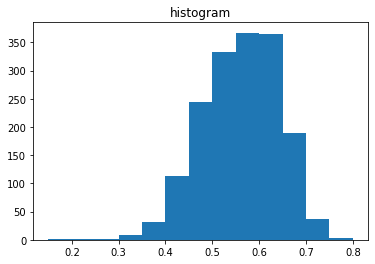

In [30]:
from matplotlib import pyplot as plt  # Import module for plotting and visualization

my_bin = list(np.arange(start=0.15,stop=0.85,step=0.05))
plt.hist(my_data[:,0], bins = my_bin) 
plt.title("histogram") 
plt.show()

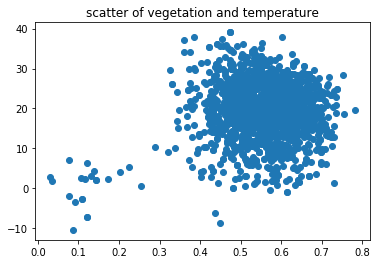

In [34]:
plt.plot(my_data[:,0], my_data[:,1],'o')
plt.title('scatter of vegetation and temperature')
plt.show()

##### Exercise

In [ ]:
# Try to visualize same information (histogram and scatters) for the temperature data.




## Challenge 1: Working with air pollution point data
##### In this challenge, you are going to work with GIS point dataset, where air pollutant NO2 and some potential predictors (indicators) are provided. While acquiring point measurement of NO2 at each station, indicators such as road length and population size within a buffer of the station is also obtained. Specifically you will have weekday daytime and nighttime NO2 point measurements at several stations (point). Road length and population size around each station (point) is indicated with the buffer size. For instance, 'populaiton_3000m' means population size within the 3000m buffer zone around each stations (point).
##### You will work with famous 'pandas' module to handle table based dataset. You will also try to learn how to study the functionality of the module by exploring online open source documentation.

In [35]:
# The first thing you need to do is to import the 'pandas' module

import pandas as pd

In [41]:
# You can be able to read *.csv based GIS point dataset by using 'pandas'

data_all = pd.read_csv('no2.csv')
#print(data_no2)
data_all.head(5)  # What does this mean?

,Point,Longitude,Latitude,weekday_daytime_no2,weekday_nighttime_no2,population_1000m,population_3000m,population_5000m,roadlength_1000m,roadlength_3000m,roadlength_5000m
0,1,3.749458,51.295278,15.486447,16.807046,440.064819,3312.588867,8206.84375,0.00000,28314.40625,60863.47656
1,2,3.916947,51.635556,14.697327,16.898273,492.458710,3886.029297,5170.12207,5352.03125,62689.73828,75216.85156
2,3,4.121389,51.978056,28.577064,30.600098,3102.089111,23252.750000,61342.87891,12614.07422,38824.15234,77248.41406
3,4,4.227778,51.931944,31.335268,33.090708,6142.983398,36911.640630,79492.71094,13942.57422,82291.88281,164851.23440
4,5,4.289172,52.078056,23.677740,26.016235,19552.472660,152638.750000,322745.00000,60375.49609,440915.18750,903282.81250


In [44]:
# Extract the daytime NO2 data as a column
# Try to figure out what does the data type mean?

daytime_no2 = data_all['weekday_daytime_no2']
type(daytime_no2)

pandas.core.series.Series

In [ ]:
# Please print it out to see how it looks like.
print(daytime_no2)

In [55]:
# You can further extract the values of the pandas column as Numpy array. Handy!

no2_val = daytime_no2.values

type(no2_val)

numpy.ndarray

In [53]:
# Please extract another column about either population or roads and inspect the information
population_3000 = data_all['population_3000m']
# type()

pop_val = population_3000.values

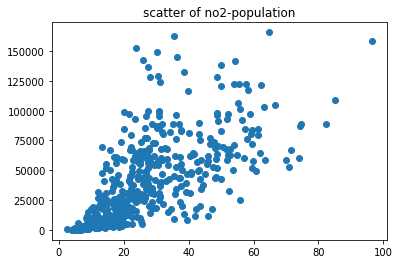

In [56]:
# Try to visualize the scatter plots of NO2 and population

plt.plot(no2_val, pop_val,'o')
plt.title('scatter of no2-population')
plt.show()

In [ ]:
# Now, imagine you want to automatically plot the scatter plot of any two columns of data given the names of the columns.
# Please try to define a function, where the input of the function are names of two columns, and the out put is the scatter plot.

In [57]:
# Recall that defining a function starts with the key word "def"
def no2_scatter(name1, name2, data):
    series1 = data[name1]
    series2 = data[name2]
    
    val1 = series1.values
    val2 = series2.values
    
    plt.plot(val1, val2,'o')
    plt.title('scatter of'+name1+name2)
    plt.show()

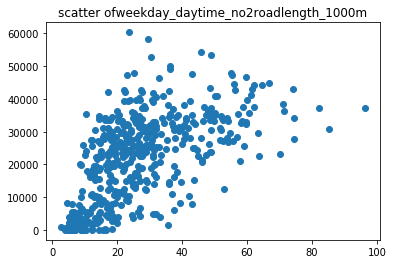

In [59]:
# Does your function work? Try to call it.

no2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)

## Challenge 2: Working with images and regression tool
##### In this challenge, you will work with remote sensing imagery data, where you will also try to figure out how to conduct regression analysis in Python by yourself! You will have two images in total. One image about impervious surface fraction, and the other about land surface temperature. You will also learn yourself with 'PIL' module that handles images, including reading, writing and processing. But we only use this module for reading images, and we will use Numpy to investigate the data. To further conduct regression analysis, you are recommended to use 'scipy' or 'sklearn' modules, but not restricted by them. You will try to generate your own functions that can repeatedly help you to accomplish similar workflow.

In [84]:
from PIL import Image  # Use 'from' to import a sub-module from a module
import numpy as np
import matplotlib.pyplot as plt

isf = Image.open('impervious_surface.tif')  # This is a PIL image object

# Print it out to see what shows up
#print()

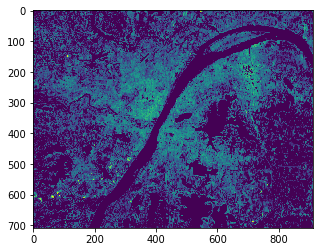

In [85]:
# You can convert the image object to Numpy array for easier operations
isf_array = np.array(isf)

# Use 'matplotlib' to visualize the array as an image
plt.imshow(isf_array)

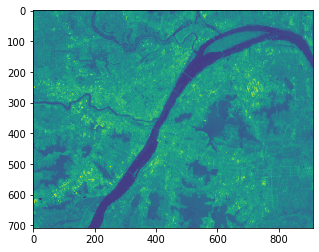

In [86]:
# Use the similar way to visualize the land surface temperature data
t = Image.open('surface_temperature.tif')  # This is a PIL image object

t_array = np.array(t)

# Use 'matplotlib' to visualize the array as an image
plt.imshow(t_array)

In [89]:
# Inspect the statistics of all the image data

# For example, the shape of the data
t_array.shape

# Or, the minimum value
#np.min(t_array)

# Others?
#np.max()
#np.std()

(708, 910)

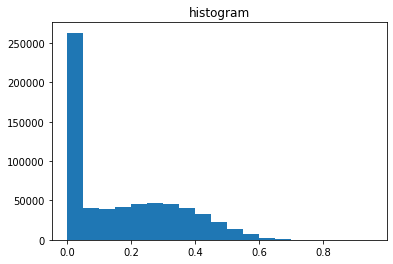

In [90]:
# Try to plot the histogram for both temperature and impervious surface data

# At this moment, the data is still 2-dimensional arrays. In order to plot histogram, you need to convert the 2-dimensional array into one column, such as this:
isf_array_col = np.reshape(isf_array,(-1,1))  # What does this mean? Try to explore Numpy online documents about this function, or print it out.

my_bin = list(np.arange(start=0.0,stop=1.0,step=0.05))
plt.hist(isf_array_col, bins = my_bin) 
plt.title("histogram") 
plt.show()

In [91]:
# How about the statistics of the temperature data?

t_array_col = np.reshape(t_array,(-1,1))  # Again, convert the data into one column

# Please write your code here to visualize the histogram for the temperature data.

my_bin = # Your code begins



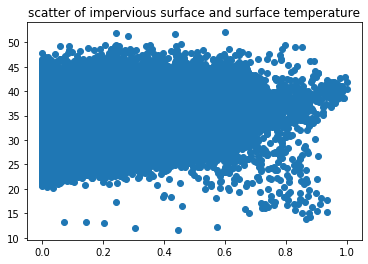

In [102]:
# Now, let's take a look at more statistics between impervious surface and temperature.

# As you may notice, even for small images, there are already a LOT of values, alway over millions of numbers.
# It can be to large for compute regression statistics.
# We can sample some data.
# As you saw, there are many 0 values in the impervious surface data, let's focus on those non-zeros.

# You may want to keep all the non-zeros in the impervious data, and also the corresponding data on temperature image.
# One way to do this is to record the index of the non-zeros on impervious image data, and extract the corresponding ones on temperature data.

# Recall how we extract index of wanted values from Numpy arrays...

ind = np.where(isf_array_col>0)  # Sample index

isf_array_reg = isf_array_col[ind]  # Sampled data for regression

t_array_reg = t_array_col[ind]

In [ ]:
# There is a 'scipy' module, which is very handy to inspect statistics among datasets, such as regression.

# You need to first import the module and then apply it to our data, for example:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(isf_array_reg, t_array_reg)

# If you print the results, for example, the correlation coefficient, what do you see?
print(r_value)

In [ ]:
# There are many powerful python modules, which can handle the large data volumn problem automatically.
# One of them is the 'sklearn' module, which samples data points for regression analysis.
# Please notice the names of the modules, and learn to explore online documents for details about the modules.

from sklearn import linear_model

In [ ]:
# Does the results makes sense? Well, may be you would also like to plot and visualize how the data appears to be.

# Given two image datasets, please define a function, where you can plot scatter plots along with regression statistics.

def scatter_img(img1, img2):
    # your code here
    # ...
    # ...
    
     
# Try to make a more complete visualization.
# Update the function you have, to plot scatters and regression lines together.